# <b> Hands On! - Parte I</b>

In [1]:
import numpy as np

1. Encontre WI sendo W = $\begin{bmatrix}
1 & 3 & 0 & 20\\   
2 &-1 & 10 & 13\\
3 & 4 & 10 & 0\\
4 & 9 & -1 & 0 \\
\end{bmatrix}$ e I =  $\begin{bmatrix}
2 & 0 \\
-4 & 11 \\
5 &-2 \\
 6 & 0 \\
\end{bmatrix}$

In [2]:
W = np.array([[1, 3, 0, 20], [2, -1, 10, 13], [3, 4, 10, 0], [4, 9, -1, 0]])
W

array([[ 1,  3,  0, 20],
       [ 2, -1, 10, 13],
       [ 3,  4, 10,  0],
       [ 4,  9, -1,  0]])

In [3]:
I = np.array([[2, 0],[-4, 11], [5, -2], [6, 0]])

In [4]:
dotWI = np.dot(W,I)

In [5]:
dotWI

array([[110,  33],
       [136, -31],
       [ 40,  24],
       [-33, 101]])

2. Construa uma matriz $5 \times 5$ e encontre traço, diagonal principal e secundária. 

In [6]:
A = np.arange(1, 26).reshape((5,5))

In [7]:
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [8]:
A.diagonal()  #diagonal principal

array([ 1,  7, 13, 19, 25])

In [9]:
np.fliplr(A).diagonal()  #diagonal secundária

array([ 5,  9, 13, 17, 21])

3. Crie uma matriz $2 \times 2$ somente com elementos pares e calcule seu determinante.

In [10]:
K = np.array([[1, 2], [3, 4]])
det = np.linalg.det(K)

In [11]:
det

-2.0000000000000004

4. Represente os sistemas abaixo  na forma matricial e encontre as respectivas soluções.

a) $\begin{cases}
2x+y=5\\
x-3y=0 \\
\end{cases}$ 

b)$\begin{cases}
2a+b+c=-1\\
a+c=0 \\
-3a+5b-c=2\\
\end{cases}$ 


* a)

In [12]:
a = np.array([[2, 1], [1, -3]])
b = np.array([[5],[0]])
solution = np.linalg.solve(a,b)

In [13]:
solution

array([[2.14285714],
       [0.71428571]])

* b)

In [14]:
a = np.array([[2, 1, 1],[1, 0, 1], [-3, 5, -1]])
b = np.array([[-1],[0],[2]])
solution = np.linalg.solve(a,b)
solution

array([[-1.00000000e+00],
       [-8.54017711e-18],
       [ 1.00000000e+00]])

5.  Determine a inversa das matrizes: 
<br>
a) H =  $\begin{bmatrix}
1 & 0 \\   
3 & 0\\
\end{bmatrix}$
<br>
b) I = $\begin{bmatrix}
1 & 0 & 0\\   
1 & 3 & 1\\
1 & 2 & 0\\
\end{bmatrix}$

* a)

In [15]:
H = np.array([[1, 0], [3, 0]])
#H_inv = np.linalg.inv(H)  #LinAlgError: Singular matrix

* b)

In [16]:
I = np.array([[1, 0, 0],[1, 3, 1],[1, 2, 0]])
I_inv = np.linalg.inv(I)
I_inv

array([[ 1. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5],
       [ 0.5,  1. , -1.5]])

# <b> Hands On! - Parte II</b>

$y = \alpha+\beta_1x_1+\beta_2x_2+\beta_3x_3+\dots+\beta_nx_n $

$\mathbf{y} = \mathbf{X\beta}$

In [17]:
import pandas as pd
import numpy as np

1. Com base nos dados gerados a seguir obtenha a matriz de coeficientes da regressão linear e em seguida utilize a biblioteca Statsmodels para verificar os resultados obtidos.

In [18]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features = 10, random_state = 99, noise = 10)

$$\hat{\beta}_{ols} = (X'X)^{-1}(X'y)$$

In [19]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ 4.7715486 , 62.26846242, 58.88375922, 20.8400168 , 27.93239634,
       47.43804226, 22.04983941, 27.58317977, 76.27859132, 95.4796263 ])

In [20]:
import statsmodels.api as sm
resultados = sm.OLS(y,X).fit()

In [21]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.557e+04
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        10:27:42   Log-Likelihood:                         -3715.0
No. Observations:                1000   AIC:                                      7450.
Df Residuals:                     990   BIC:                                      7499.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.7715      0.324     14.724      0.000       4.136       5.407
x2            62.2685      0.316    196.869      0.000      61.648      62.889
x3            58.8838      0.325    181.240      0.000      58.246      59.521
x4            20.8400      0.319     65.415      0.000      20.215      21.465
x5            27.9324      0.319     87.483      0.000      27.306      28.559
x6            47.4380      0.320    148.026      0.000      46.809      48.067
x7            22.0498      0.309     71.259      0.000      21.443      22.657
x8            27.5832      0.306     90.103      0.000      26.982      28.184
x9            76.2786      0.312    244.185      0.000      75.666      76.892
x10           95.4796      0.296    322.524      0.000      94.899      96.061
==============================================================================
Omnibus:                        1.297   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.251
Skew:                          -0.086   Prob(JB):                        0.535
Kurtosis:                       3.013   Cond. No.                         1.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Use a biblioteca sklearn para ajustar um modelo de regressão linear com base nas matrizes anteriores, calcule ainda outras métricas de avaliação da regressão. Use a função train_test_split() para separar os dados em treino e teste com random_state igual a 55. 

In [22]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [23]:
X, y = make_regression(n_samples = 1000, n_features = 10, random_state = 99, noise = 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 55)

In [24]:
X_train.shape, X_test.shape

((750, 10), (250, 10))

In [25]:
y_train.shape, y_test.shape

((750,), (250,))

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
linear_model.coef_

array([12.34388309, 64.39133339, 63.38436935, 17.64858417, 26.59123124,
       49.92256936, 22.64987881, 25.15713574, 79.08743627, 95.50912102])

In [28]:
linear_model.score(X_test, y_test)

0.705556129744989

In [29]:
y_predict = linear_model.predict(X_test)

In [30]:
mean_squared_error(y_test, y_predict)

9833.508981040337

In [31]:
mean_absolute_error(y_test, y_predict)

78.2045124009134

3.

a. Importe o banco de dados anexo nesta aula (kc_house_data.csv);

b. Mostre as 5 primeiras linhas;

c. Mostre as colunas e o índice do dataset;

d. Mostre o shape do dataset;

e. Mostre informações do objeto criado com a função info();

f. Mostre o dtype de cada coluna;

g. Remova as seguintes colunas: 'id', 'date', 'zipcode', 'lat', 'long';

h. Verifique se há missing data no dataset;

i. Mostre estatísticas descritivas do dataset com a função describe();

j. Calcule a matriz de correlação;

l. Calcule a matriz de covariância;

m. Faça um mapa de calor com base na matriz de correlação, use o módulo Seaborn;

n. Faça um gráfico das relações entre as variáveis do dataset com a função pairplot do módulo Seaborn;

o. Defina a variável target (coluna 'price') e armazene em uma variável;

p. Defina as variáveis preditoras, que serão utilizadas para explicar o preço, e armazene em uma variável;

q. Use a função train_test_split do sklearn para separar o dataset em dados de treino e teste, defina o test_size = 0.3 e random_state = 33;

r. Crie um modelo de regressão linear e ajuste aos dados de treino, use: from sklearn.linear_model import LinearRegression;

s. Calcule o coeficiente de determinação do modelo com a função score(), passando os dados de teste;

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 21)
pd.set_option('precision', 2)

### a)

In [33]:
df = pd.read_csv('kc_house_data.csv')

### b)

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### c)

In [35]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [36]:
for coluna in df:
    print(coluna)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [37]:
df.index

RangeIndex(start=0, stop=21613, step=1)

### d)

In [38]:
df.shape

(21613, 21)

In [39]:
df.ndim

2

### e)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### f)

In [41]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### g)

In [42]:
col = ['id', 'date', 'zipcode', 'lat', 'long']
df.drop(columns = col, axis = 1, inplace = True)

### h)

In [43]:
df.notnull().sum()

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [44]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

### i)

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,5.40e+05,367127.20,75000.0,321950.00,450000.00,645000.0,7.70e+06
bedrooms,21613.0,3.37e+00,0.93,0.0,3.00,3.00,4.0,3.30e+01
bathrooms,21613.0,2.11e+00,0.77,0.0,1.75,2.25,2.5,8.00e+00
sqft_living,21613.0,2.08e+03,918.44,290.0,1427.00,1910.00,2550.0,1.35e+04
sqft_lot,21613.0,1.51e+04,41420.51,520.0,5040.00,7618.00,10688.0,1.65e+06
floors,21613.0,1.49e+00,0.54,1.0,1.00,1.50,2.0,3.50e+00
waterfront,21613.0,7.54e-03,0.09,0.0,0.00,0.00,0.0,1.00e+00
view,21613.0,2.34e-01,0.77,0.0,0.00,0.00,0.0,4.00e+00
condition,21613.0,3.41e+00,0.65,1.0,3.00,3.00,4.0,5.00e+00
grade,21613.0,7.66e+00,1.18,1.0,7.00,7.00,8.0,1.30e+01


### j)

In [46]:
corr = df.corr()

In [47]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.00,3.08e-01,0.53,0.70,8.97e-02,2.57e-01,2.66e-01,0.40,3.64e-02,0.67,0.61,0.32,0.05,1.26e-01,5.85e-01,8.24e-02
bedrooms,0.31,1.00e+00,0.52,0.58,3.17e-02,1.75e-01,-6.58e-03,0.08,2.85e-02,0.36,0.48,0.30,0.15,1.88e-02,3.92e-01,2.92e-02
bathrooms,0.53,5.16e-01,1.00,0.75,8.77e-02,5.01e-01,6.37e-02,0.19,-1.25e-01,0.66,0.69,0.28,0.51,5.07e-02,5.69e-01,8.72e-02
sqft_living,0.70,5.77e-01,0.75,1.00,1.73e-01,3.54e-01,1.04e-01,0.28,-5.88e-02,0.76,0.88,0.44,0.32,5.54e-02,7.56e-01,1.83e-01
sqft_lot,0.09,3.17e-02,0.09,0.17,1.00e+00,-5.20e-03,2.16e-02,0.07,-8.96e-03,0.11,0.18,0.02,0.05,7.64e-03,1.45e-01,7.19e-01
floors,0.26,1.75e-01,0.50,0.35,-5.20e-03,1.00e+00,2.37e-02,0.03,-2.64e-01,0.46,0.52,-0.25,0.49,6.34e-03,2.80e-01,-1.13e-02
waterfront,0.27,-6.58e-03,0.06,0.10,2.16e-02,2.37e-02,1.00e+00,0.40,1.67e-02,0.08,0.07,0.08,-0.03,9.29e-02,8.65e-02,3.07e-02
view,0.40,7.95e-02,0.19,0.28,7.47e-02,2.94e-02,4.02e-01,1.00,4.60e-02,0.25,0.17,0.28,-0.05,1.04e-01,2.80e-01,7.26e-02
condition,0.04,2.85e-02,-0.12,-0.06,-8.96e-03,-2.64e-01,1.67e-02,0.05,1.00e+00,-0.14,-0.16,0.17,-0.36,-6.06e-02,-9.28e-02,-3.41e-03
grade,0.67,3.57e-01,0.66,0.76,1.14e-01,4.58e-01,8.28e-02,0.25,-1.45e-01,1.00,0.76,0.17,0.45,1.44e-02,7.13e-01,1.19e-01


### l)

$\mathrm{Cov(X,X)} = Var(X)$

In [48]:
cov = df.cov()

In [49]:
cov

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.35e+11,1.05e+05,1.48e+05,2.37e+08,1.36e+09,5.09e+04,8.46e+03,111772.97,8.69e+03,2.88e+05,1.84e+08,5.26e+07,582448.36,1.86e+07,1.47e+08,8.26e+08
bedrooms,1.05e+05,8.65e-01,3.70e-01,4.93e+02,1.22e+03,8.81e-02,-5.30e-04,0.06,1.72e-02,3.90e-01,3.68e+02,1.25e+02,4.21,7.04e+00,2.50e+02,7.43e+02
bathrooms,1.48e+05,3.70e-01,5.93e-01,5.34e+02,2.80e+03,2.08e-01,4.25e-03,0.11,-6.26e-02,6.02e-01,4.37e+02,9.67e+01,11.45,1.57e+01,3.00e+02,1.83e+03
sqft_living,2.37e+08,4.93e+02,5.34e+02,8.44e+05,6.57e+06,1.76e+02,8.25e+00,200.31,-3.51e+01,8.23e+02,6.67e+05,1.77e+05,8580.24,2.04e+04,4.76e+05,4.60e+06
sqft_lot,1.36e+09,1.22e+03,2.80e+03,6.57e+06,1.72e+09,-1.16e+02,7.74e+01,2371.39,-2.41e+02,5.53e+03,6.29e+06,2.80e+05,64580.85,1.27e+05,4.11e+06,8.13e+08
floors,5.09e+04,8.81e-02,2.08e-01,1.76e+02,-1.16e+02,2.92e-01,1.11e-03,0.01,-9.27e-02,2.91e-01,2.34e+02,-5.87e+01,7.76,1.37e+00,1.04e+02,-1.66e+02
waterfront,8.46e+03,-5.30e-04,4.25e-03,8.25e+00,7.74e+01,1.11e-03,7.49e-03,0.03,9.38e-04,8.42e-03,5.16e+00,3.09e+00,-0.07,3.23e+00,5.13e+00,7.25e+01
view,1.12e+05,5.67e-02,1.11e-01,2.00e+02,2.37e+03,1.22e-02,2.66e-02,0.59,2.29e-02,2.26e-01,1.06e+02,9.39e+01,-1.20,3.20e+01,1.47e+02,1.52e+03
condition,8.69e+03,1.72e-02,-6.26e-02,-3.51e+01,-2.41e+02,-9.27e-02,9.38e-04,0.02,4.23e-01,-1.11e-01,-8.53e+01,5.01e+01,-6.91,-1.58e+01,-4.14e+01,-6.05e+01
grade,2.88e+05,3.90e-01,6.02e-01,8.23e+02,5.53e+03,2.91e-01,8.42e-03,0.23,-1.11e-01,1.38e+00,7.36e+02,8.76e+01,15.43,6.81e+00,5.75e+02,3.83e+03


### m)

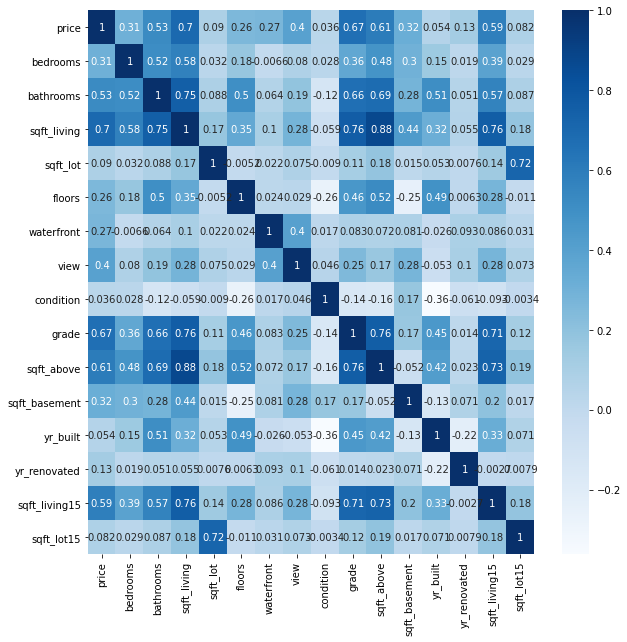

In [50]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap = 'Blues', annot = True);

### n)

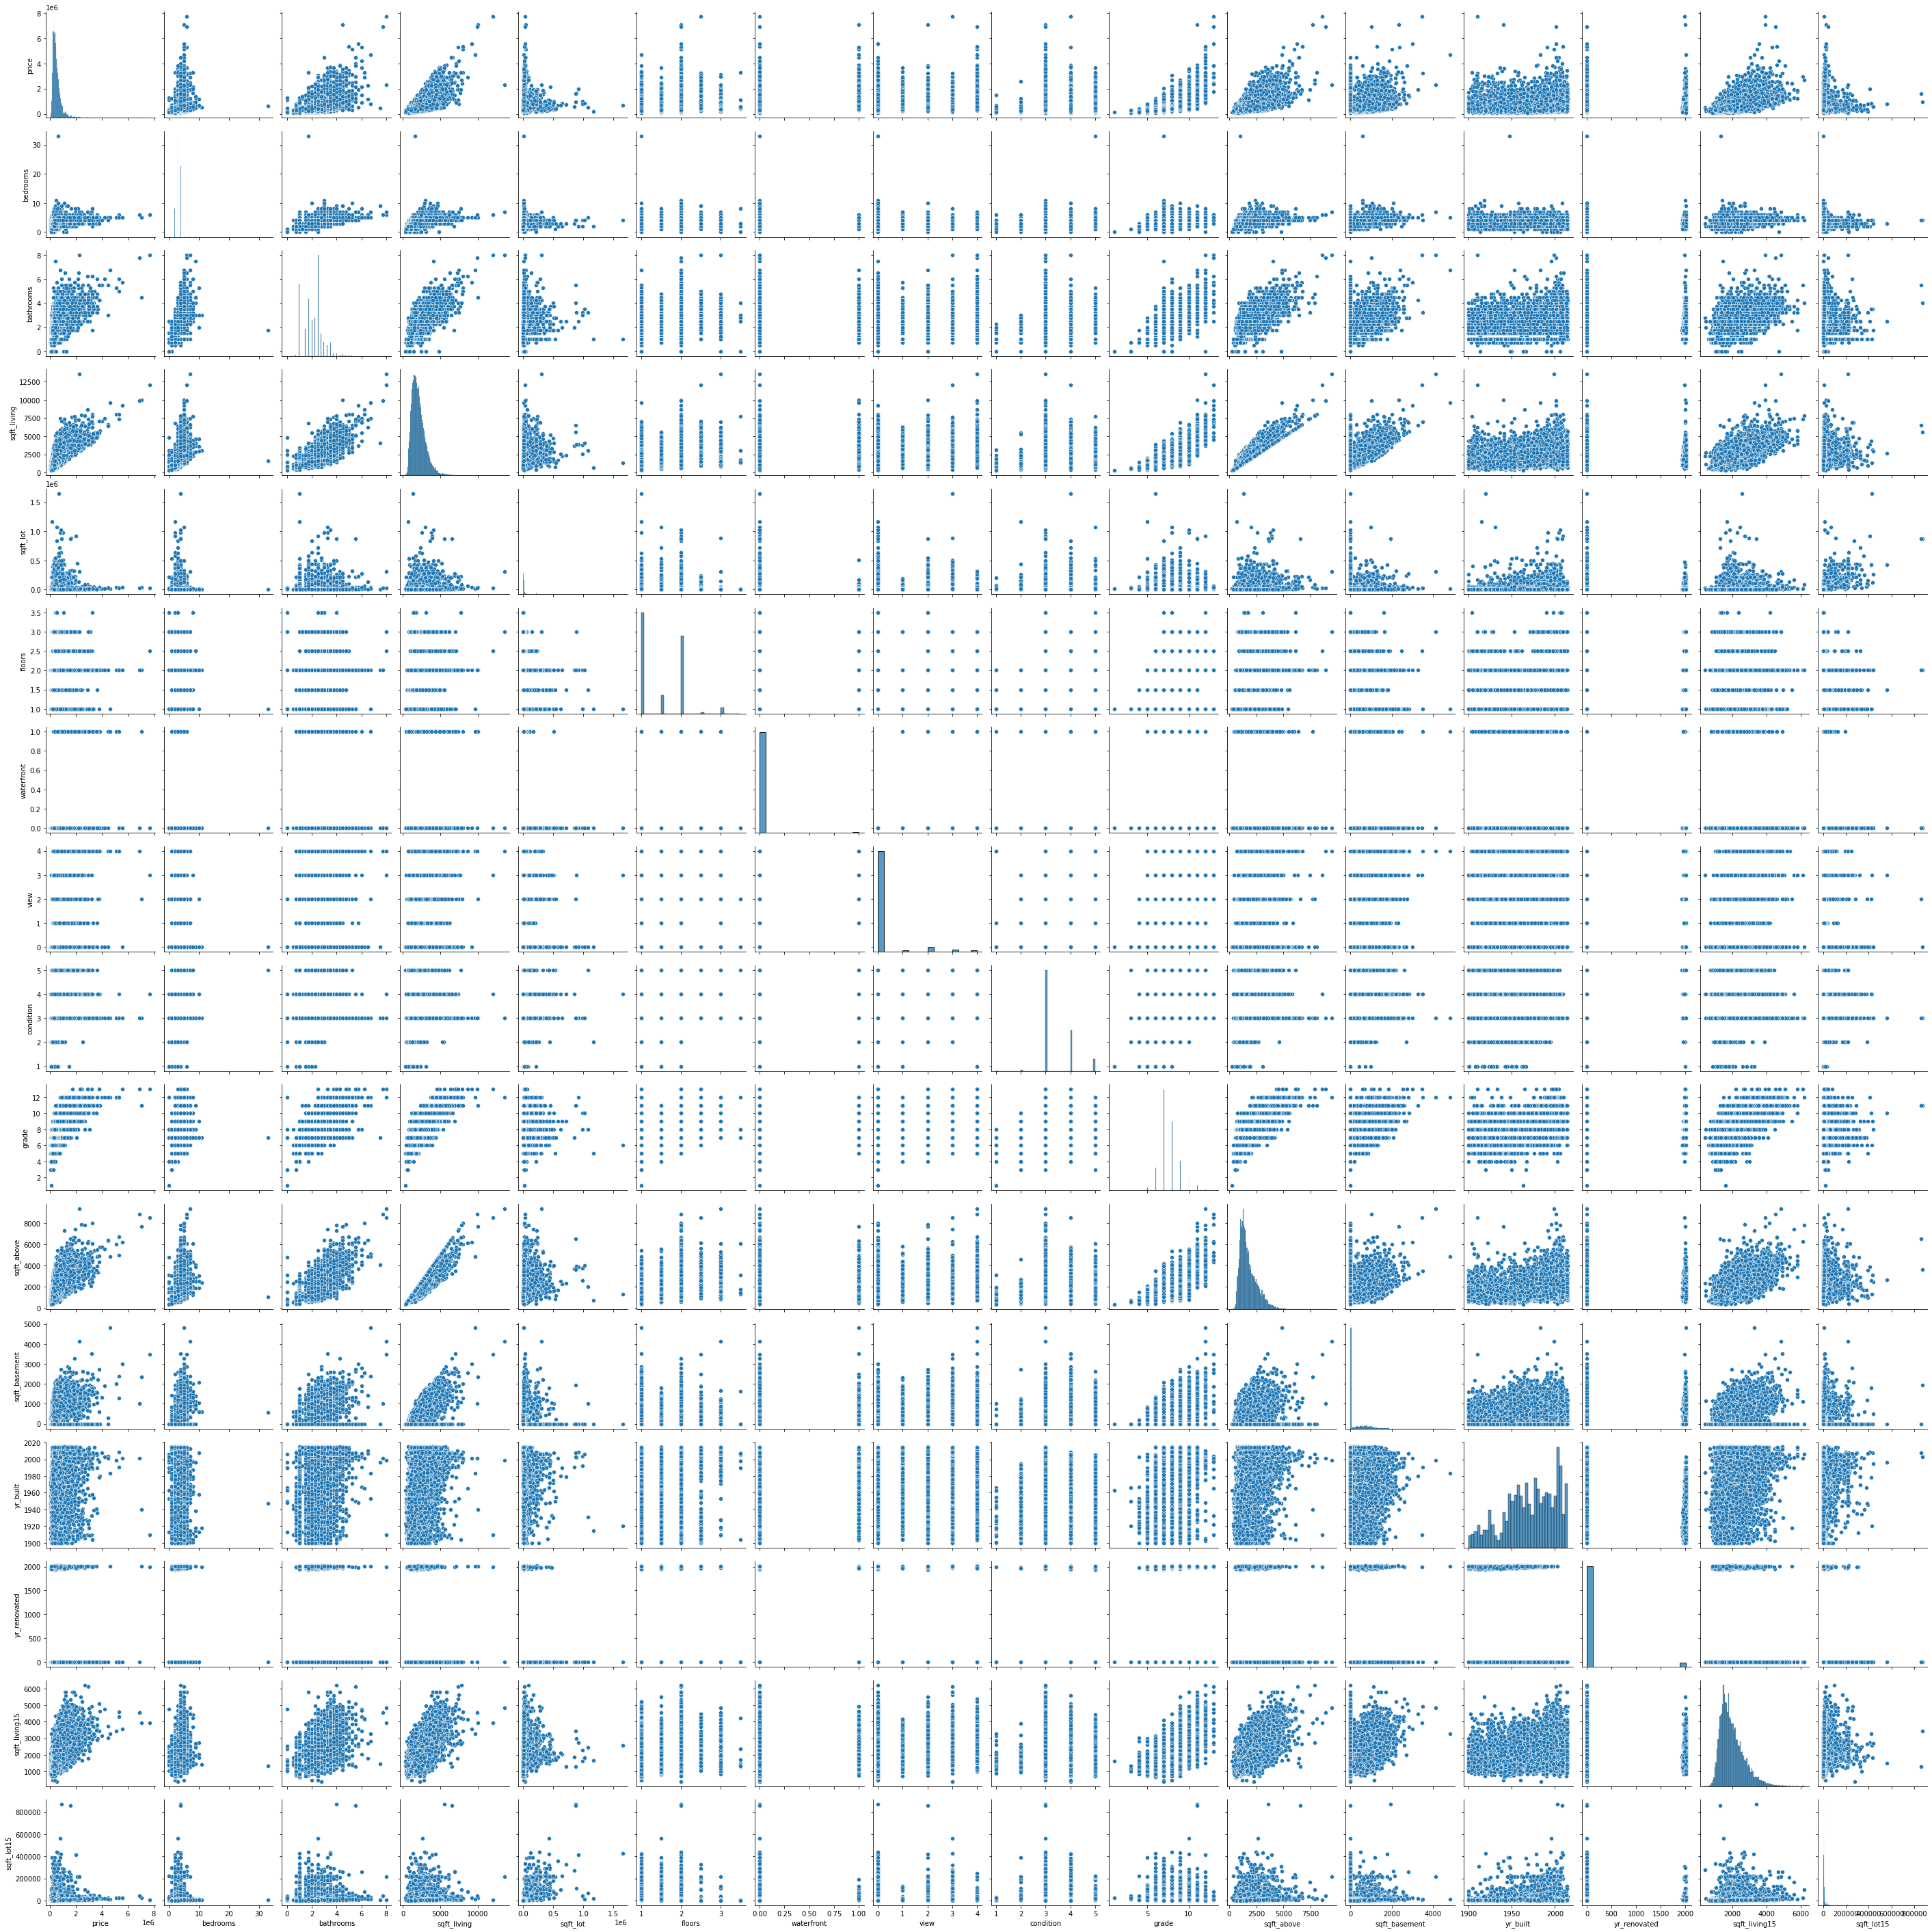

In [51]:
sns.pairplot(df);

### o)p)

In [52]:
y = df['price']
x = df.drop('price', axis = 1)

### q)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 33)

### r)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

### s)

In [57]:
modelo.score(x_teste, y_teste)

0.6496675233034808